<a href="https://colab.research.google.com/github/Mdhasim-tech/Deep-Learning/blob/main/Next_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [16]:
medium_data=pd.read_csv('medium_data.csv')
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [17]:
print("Number of records: ",medium_data.shape[0])
print("Number of fields: ",medium_data.shape[1])

Number of records:  6508
Number of fields:  10


In [18]:
medium_data['title']

,title
0,A Beginner’s Guide to Word Embedding with Gens...
1,Hands-on Graph Neural Networks with PyTorch & ...
2,How to Use ggplot2 in Python
3,Databricks: How to Save Files in CSV on Your L...
4,A Step-by-Step Implementation of Gradient Desc...
...,...
6503,“We” vs “I” — How Should You Talk About Yourse...
6504,How Donald Trump Markets Himself
6505,Content and Marketing Beyond Mass Consumption
6506,5 Questions All Copywriters Should Ask Clients...


In [19]:
medium_data['title']=medium_data['title'].apply(lambda x:x.replace(u'\xa0',u' '))
medium_data['title']=medium_data['title'].apply(lambda x:x.replace(u'\u200a',u' '))

In [24]:
tokenizer=Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words=len(tokenizer.word_index)+1;
print(tokenizer.word_index)
print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

{'<oov>': 1, 'to': 2, 'the': 3, 'strong': 4, 'a': 5, 'of': 6, 'how': 7, 'and': 8, 'in': 9, 'your': 10, 'markup': 11, 'for': 12, 'you': 13, 'with': 14, 'is': 15, '—': 16, 'data': 17, 'why': 18, 'class': 19, 'h3': 20, 'i': 21, 'what': 22, 'on': 23, 'learning': 24, 'from': 25, 'an': 26, 'be': 27, 'my': 28, 'writing': 29, 'are': 30, 'it': 31, 'can': 32, 'using': 33, 'design': 34, 'machine': 35, 'ux': 36, 'about': 37, 'do': 38, 'not': 39, 'python': 40, 'ai': 41, 'life': 42, 'that': 43, 'when': 44, 'should': 45, 'we': 46, '5': 47, 'science': 48, 'make': 49, 'time': 50, 'need': 51, 'as': 52, '3': 53, 'more': 54, 'at': 55, 'business': 56, 'or': 57, 'part': 58, 'have': 59, 'work': 60, 'new': 61, 'don’t': 62, 'up': 63, 'by': 64, 'write': 65, 'get': 66, 'use': 67, 'guide': 68, 'will': 69, 'marketing': 70, '1': 71, 'ways': 72, 'deep': 73, 'best': 74, 'analysis': 75, 'first': 76, '2019': 77, 'product': 78, 'better': 79, 'things': 80, 'neural': 81, 'know': 82, 'this': 83, 'future': 84, 'good': 85, '

In [33]:
input_sequences=[]
for line in medium_data['title']:
  token_list=tokenizer.texts_to_sequences([line])[0]
  # print(token_list)

  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))
print(len(input_sequences))

Total input sequences:  48461
48461


In [37]:
print(medium_data['title'].shape)

(6508,)


In [39]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences

array([[  0,   0,   0, ...,   0,   5, 676],
       [  0,   0,   0, ...,   5, 676,  68],
       [  0,   0,   0, ..., 676,  68,   2],
       ...,
       [  0,   0,   0, ...,   5,  85,  56],
       [  0,   0,   0, ...,  85,  56, 730],
       [  0,   0,   0, ...,  56, 730, 550]], dtype=int32)

In [40]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [43]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)
print (model.summary())
print(model)

Epoch 1/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.0979 - loss: 7.0746
Epoch 2/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1769 - loss: 5.7286
Epoch 3/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.2126 - loss: 4.8445
Epoch 4/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.2608 - loss: 4.0639
Epoch 5/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.3192 - loss: 3.4852
Epoch 6/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3634 - loss: 3.1311
Epoch 7/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3978 - loss: 2.8640
Epoch 8/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4201 - loss: 2.6942
Epoch 9/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4406 - loss: 2.5648
Epoch 10/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4491 - loss: 2.5043
Epoch 11/50
1515/1515 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4648 - loss: 2.4003
Epoch 12

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 39, 100)        │       823,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 300)            │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8238)           │     2,479,638 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,813,916 (41.25 MB)

 Trainable params: 3,604,638 (13.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,209,278 (27.50 MB)

None
<Sequential name=sequential_3, built=True>


In [44]:
# plotting model accuracy and loss
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()

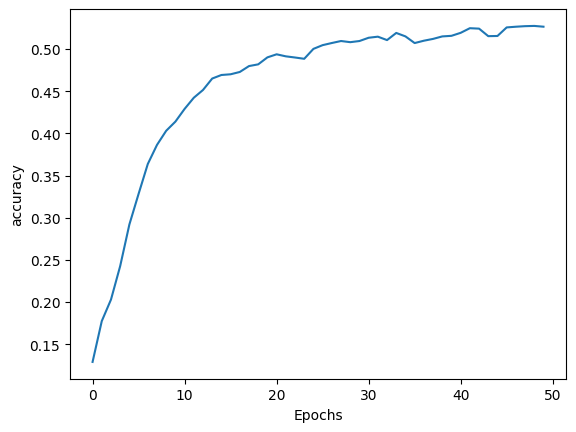

In [45]:
plot_graphs(history,'accuracy')

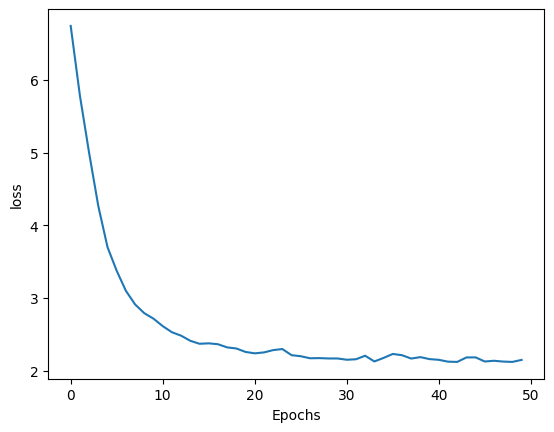

In [46]:
plot_graphs(history,'loss')


In [52]:
# Predicting next word of title
seed_text='implimentation of'
next_words=2

for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
  predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
  output_word=""

  for word,index in tokenizer.word_index.items():
    if index==predicted:
      output_word=word
      break
  seed_text+=" "+ output_word
print(seed_text)

implimentation of the inner
